In [1]:
import numpy as np
from datetime import datetime
import cv2
import os
from PIL import Image
import torch
import torchvision
from torchvision import datasets, transforms, models
from dataset import Asbest_segmentation
from tqdm import tqdm
import matplotlib.pyplot as plt
import rawpy
from utils import parse_anno_file, create_mask_file, big_image_predict, get_time, true_results
from apex import amp

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [15]:
from torch import nn
from torch import sigmoid
import segmentation_models_pytorch as smp


device = torch.device("cuda:" + str(torch.cuda.device_count() - 1) if torch.cuda.is_available() else "cpu")

model = smp.Unet(encoder_name='efficientnet-b3', in_channels=1, classes=2,  activation='sigmoid').to(device)

model.load_state_dict(torch.load('asbest_segmentation.pth'));

(-0.5, 5183.5, 3455.5, -0.5)

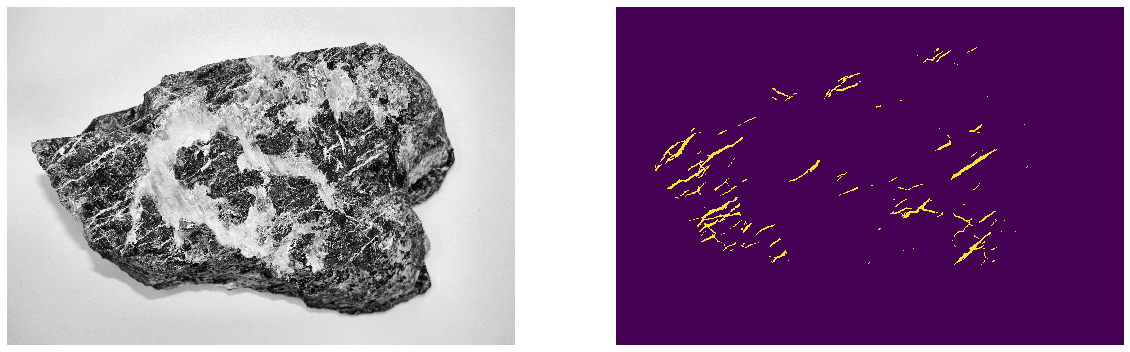

In [17]:
img = cv2.imread('asbest/images/IMG_2689.png', cv2.IMREAD_GRAYSCALE)
# img_shape = img.shape
img, _, asb = big_image_predict(model, 
                                  img, 
                                  crop_size=(img.shape[0] // 2, img.shape[1] // 2),
                                  inp_size=(2*448,2*448),
                                  device=device
                                 )
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(122)
plt.imshow(asb > 0.5)
plt.axis('off')

(-0.5, 2591.5, 2047.5, -0.5)

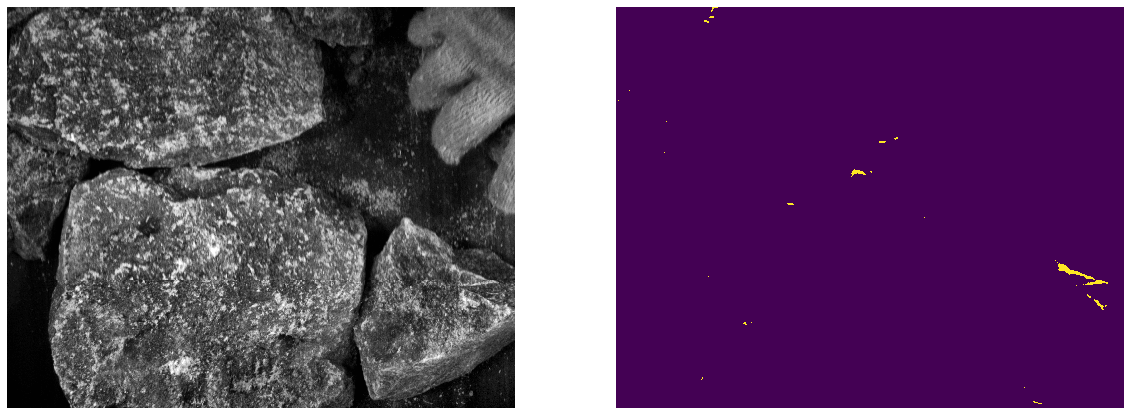

In [23]:
img = cv2.imread('asbest/tr_stones/20_12:23:59_16-03-2020_1.png', cv2.IMREAD_UNCHANGED)
# img_shape = img.shape
img, st, asb = big_image_predict(model, 
                                  img, 
                                  crop_size=(img.shape[0] // 2, img.shape[1] // 2),
                                  inp_size=(2*448,2*448),
                                  device=device
                                 )
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(122)
plt.imshow(asb > 0.5)
plt.axis('off')

(-0.5, 2591.5, 2047.5, -0.5)

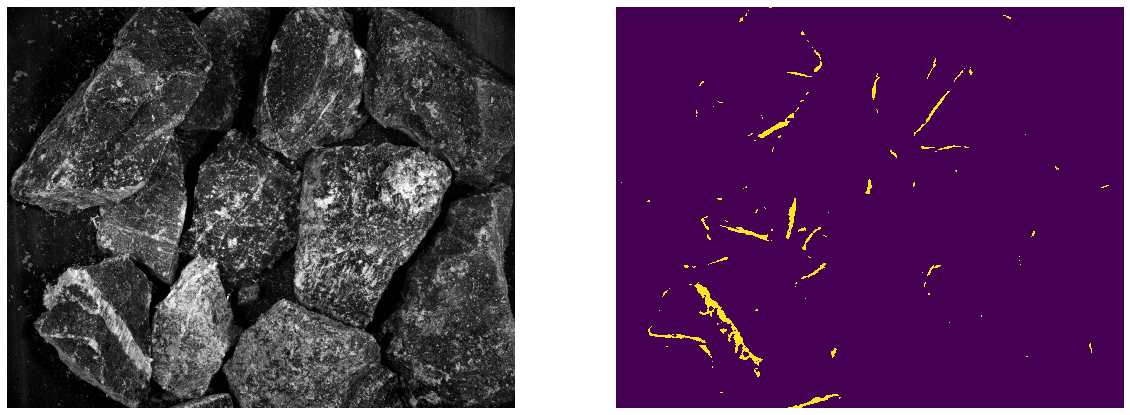

In [27]:
img = cv2.imread('asbest/tr_stones/17_12:16:32_16-03-2020_1.png', cv2.IMREAD_UNCHANGED)
# img_shape = img.shape
img, st, asb = big_image_predict(model, 
                                  img, 
                                  crop_size=(img.shape[0] // 2, img.shape[1] // 2),
                                  inp_size=(2*448,2*448),
                                  device=device
                                 )
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(122)
plt.imshow(asb > 0.5)
plt.axis('off')